In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file 
cdc_df = pd.read_csv('cdc.codes/cdc.csv')
full_data_2017 = pd.read_csv('cdc.codes/2017_code_data.csv')
full_data_2017
adult_data_2017 = pd.read_csv('cdc.codes/samadult.csv')
adult_data_2017

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,MBO_PRO1,YTQU_YG1,YTQ_BTY1,YTQ_MDY1,YTQU_TA1,YTQ_BTT1,YTQ_MDT1,YTQU_QG1,YTQ_BTQ1,YTQ_MDQ1
0,1,1,3,1,5829.3,5044,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
1,1,1,9,1,2752.4,3770,1,12,7,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
2,2,1,11,1,14902.0,17305,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
3,1,1,15,1,8531.8,7383,2,12,5,1,...,2,1,1.0,1.0,1,1.0,2.0,2,NaN,NaN
4,1,1,18,1,5477.2,8314,1,0,1,1,...,2,1,1.0,1.0,2,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2,1,58880,4,7030.2,6082,2,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26738,1,1,58881,4,6261.6,5557,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26739,1,1,58882,4,7818.1,7603,2,12,1,2,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26740,1,1,58883,4,8691.9,7833,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN


In [3]:
# Reorganize the columns
cdc_df = cdc_df[['Code', 'Description', 'Category']]
cdc_df


,Code,Description,Category
0,URBRRL,Geography (urban vs suburban vs rural),Demographics
1,REGION,"US Geographic Region (SE, NW)",Demographics
2,SEX_A,Sex,Demographics
3,HISP_A,Hispanic ethnicity,Demographics
4,HISPALLP_A,Hispanic and other ethnicity (mixed),Demographics
...,...,...,...
69,MODFREQW_A,moderate physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
70,VIGFREQW_A,vigorous physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
71,PA18_05R_A,met 2018 physical activity guidelines = 150+ m...,Lifestyle / Chronic Disease Indicators
72,SLPREST_A,"sleep quality (""over past 30 days, how often d...",Lifestyle / Chronic Disease Indicators


In [4]:
# Removing spaces in column names
adult_data_2017.columns = adult_data_2017.columns.to_series().apply(lambda x:x.strip())


In [5]:
# Selecting the columns we need and adding them to a dataframe
filtered_data_2017 = adult_data_2017 [["REGION", "SEX", "HISPAN_I","RACERPI2",
                              "R_MARITL", "HYPEV", "CHLEV", "CHDEV",
                              "EPHEV", "AASMEV", "CANEV", "DIBEV1",
                              "DIBTYPE", "EPILEP1", "ARTH1", "HRAIDNOW",
                              "AVISION", "AHSTATYR", "PAINLMT", "FLWALK",
                              "ALCHRONR", "SMKSTAT2", "MODFREQW", "ALCSTAT",
                              "AHCPLROU", "AWORPAY", "ADNLONG2", "AHCSYR1",
                              "AHERNOY2", "AHCHYR", "ASRGYR", "AMDLONGR",
                              "AEXCHNG", "ASICPUSE", "ASISIM", "ASISIF",
                              "ASISLPFL", "MBO_SPR1", "AWEBUSE", "AFLHCA17"]]
filtered_data_2017.head()

,REGION,SEX,HISPAN_I,RACERPI2,R_MARITL,HYPEV,CHLEV,CHDEV,EPHEV,AASMEV,...,ASRGYR,AMDLONGR,AEXCHNG,ASICPUSE,ASISIM,ASISIF,ASISLPFL,MBO_SPR1,AWEBUSE,AFLHCA17
0,3,2,12,1,4,1,1,2,2,2,...,2,2,NaN,4,NaN,2.0,0,2,1,NaN
1,2,1,12,1,7,2,2,2,2,2,...,2,2,2.0,4,2.0,NaN,6,2,1,NaN
2,2,1,12,1,1,2,2,2,2,1,...,2,1,2.0,3,2.0,NaN,7,2,1,2.0
3,2,2,12,1,5,2,2,2,2,2,...,2,1,NaN,4,NaN,2.0,0,1,1,NaN
4,3,1,0,1,1,2,2,2,2,1,...,2,2,2.0,4,2.0,NaN,0,1,1,NaN


In [6]:
filtered_data_2017 = filtered_data_2017.rename(columns = {"AFLHCA17" : "Suffering from Dep/Anx",
                                                          "REGION" : "Geographic Region", "SEX" : "SEX",
                                                          "HISPAN_I" : "Hispanic Origin",
                                                          "RACERPI2" : "Race", "R_MARITL" : "Marital Status",
                                                          "HYPEV" : "Hypertension", "CHLEV" : "Cholesterol",
                                                          "CHDEV" : "Coronary Heart Disease", "EPHEV" : "emphysema",
                                                          "AASMEV" : "Asthma", "CANEV" : "Cancer",
                                                          "DIBEV1" : "Diabetes", "DIBTYPE" : "Diabetes Type",
                                                          "EPILEP1" : "Epilepsy", "ARTH1" : "Arthritis",
                                                          "HRAIDNOW" : "Using a Hearing Aid",
                                                          "AVISION" : "Trouble seeing W/Glasses/Lenses",
                                                          "AHSTATYR" : "Health Status (Past 12m)",
                                                          "PAINLMT" : "Pain Severity (Past 6m)",
                                                          "FLWALK" : "Mobility/Ability to Walk Unaided",
                                                          "ALCHRONR" : "Overall Functional Limitation",
                                                          "SMKSTAT2" : "Smoking Status",
                                                          "MODFREQW" : "Moderate Activity/W",
                                                          "ALCSTAT" : "Alcohol Drinking Status",
                                                          "AHCPLROU" : "Usual Place for Routine/Preventive Care",
                                                          "AWORPAY" : "Medical Bills Pay Worry",
                                                          "ADNLONG2" : "Time Since Dentist's Last Visit",
                                                          "AHCSYR1" : "Seen/Talked With Mental Specialist (Past 12m)",
                                                          "AHERNOY2" : "ER/ED Freq. (Past 12m)",
                                                          "AHCHYR" : "Home Care Received (Past 12m)",
                                                          "ASRGYR" : "Surgery/Surgical Procedures (Past 12m)",
                                                          "AMDLONGR" : "Time Since Last Seen/Talked to a Health Pro",
                                                          "AEXCHNG" : "Looked into Buying Ins. through Healthcare.gov/Health Ins. MP",
                                                          "ASICPUSE" : "Computer Use Freq.", "ASISIM" : "Sexual Orientation (M)",
                                                          "ASISIF" : "Sexual Orientation (F)",
                                                          "ASISLPFL" : "Difficutly Falling Asleep (Past W)",
                                                          "MBO_SPR1" : "Used Spiritual Meditation (Past 12m)",
                                                          "AWEBUSE" : "Internet use"})
filtered_data_2017.head()

,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,Asthma,...,Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use,Suffering from Dep/Anx
0,3,2,12,1,4,1,1,2,2,2,...,2,2,NaN,4,NaN,2.0,0,2,1,NaN
1,2,1,12,1,7,2,2,2,2,2,...,2,2,2.0,4,2.0,NaN,6,2,1,NaN
2,2,1,12,1,1,2,2,2,2,1,...,2,1,2.0,3,2.0,NaN,7,2,1,2.0
3,2,2,12,1,5,2,2,2,2,2,...,2,1,NaN,4,NaN,2.0,0,1,1,NaN
4,3,1,0,1,1,2,2,2,2,1,...,2,2,2.0,4,2.0,NaN,0,1,1,NaN


In [7]:
# Renaming the dataframe
df_17 = filtered_data_2017
corr = df_17.corr()



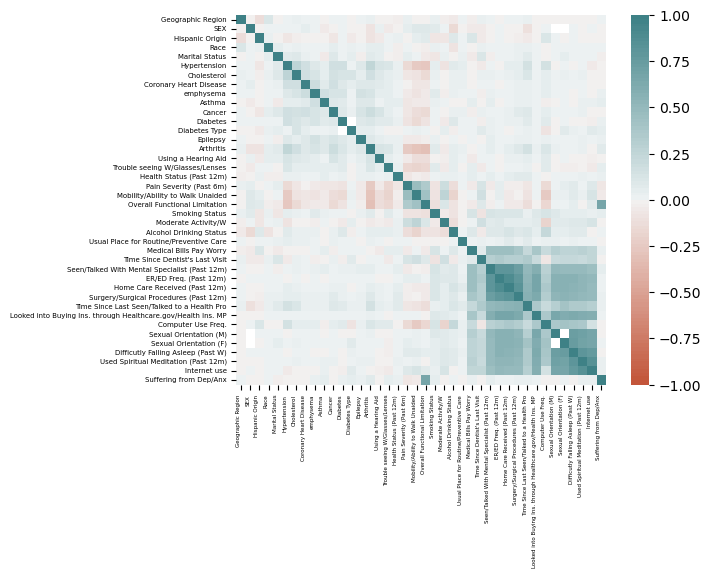

In [8]:
# plot a heat matrix
ax = sns.heatmap(corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=4,
    horizontalalignment='right'
  
);

In [9]:
# Creating a new dataframe with the targeted columns
selected_col = df_17[["Suffering from Dep/Anx" , "Health Status (Past 12m)", "Pain Severity (Past 6m)", "Smoking Status"]].dropna()

In [10]:
# Getting just yes and nos
selected_col =selected_col.loc[(selected_col["Suffering from Dep/Anx"] == 1) |
                               (selected_col["Suffering from Dep/Anx"] == 2)]

In [11]:
# Replacing some values
selected_col["Health Status (Past 12m)"] = selected_col["Health Status (Past 12m)"].replace({3 : 2, 2 : 3})
selected_col.head()

,Suffering from Dep/Anx,Health Status (Past 12m),Pain Severity (Past 6m),Smoking Status
2,2.0,2,2.0,2
7,2.0,2,2.0,3
8,2.0,2,1.0,3
13,2.0,3,1.0,4
14,2.0,1,2.0,3


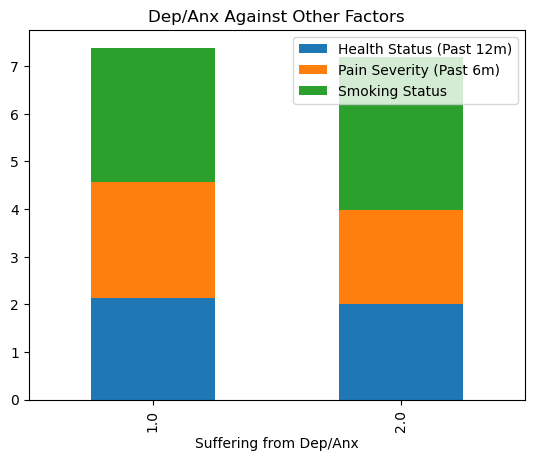

In [12]:
# Depressed vs undepressed in relation to other factors 
selected_col.groupby("Suffering from Dep/Anx").mean().plot.bar(stacked=True, title="Dep/Anx Against Other Factors")
plt.savefig("resources/Fig2.png")